# Perceptron Learning Algorithm 

### This is programmed in R programming language

## Synopsis of The Perceptron  
   The Perceptron learning algorithm is an algorithm that is used for supervised learning of binary clusters.The supervised learning involves giving conditions(inputs) with documented outputs. An allusion of learning and the binary clusters means that the choice of output has only two outcomes. The Perceptron was invented in 1957 by Frank Rosenblatt Ph.D. The idea is that the Perceptron works just like the neuron of a nervous system. Each neuron receives thousands of signals from other neurons, connected via synapses. Once the sum of the signals being received surpasses a certain threshold, a response is sent through the axon.

![Neuron Perceptron picture](neuronperceptron.png)

## Composition of the Perceptron Learning Algorithm
The implementation of the perceptron learning algorithm involves using a collection of features to answer a question that has two choices; binary cluster. And the algorithm learns to make these choices from being exposed to previous data collected with resultant outcomes with one of the two choices. 
So what we have actualy is:

<img align="center" width="500" height="300" src="perceptron.png">

$\mathcal{X} \subseteq \mathbb{R}^d$ and $d \in \mathbb{N}$ be the input space, and let $\mathcal{Y} = \{-1, 1\}$ 
 $x$: Input customer information that is used to make credit decision.
* $f:\mathcal{X} \rightarrow \mathcal{Y}$: *Unknown target* function that is the ideal formula for credit approval. 
* $\mathcal{X}$: *Input space* consisting of all possible input $x$.
* $\mathcal{Y}$: *Output space* consisting of no or yes credit approval.
* $\mathcal{D}$: *Data set* of tuples in  input-output examples of the form $(x_i, y_i)$, where $f(x_i) = y_i$ and $i \in \mathbb{N}$ .
* $\mathcal{A}$: Learning algorithm which uses $D$ to pick a formula (hypothesis) $g:\mathcal{X}\rightarrow \mathcal{Y}$ so that $g\approx f$, where $g\in \mathcal{H}$. Here $\mathcal{H}$ is the *hypothesis space*. 

For $h \in \mathcal{H}$, $h(x)$ gives different weights to the different coordinates of $x$. This reflects the relative importance of each coordinate to the credit decision. The combinded weighted coordinates form a credit score which is compared to some threshold, say $theta$. 

* Approve if
$$
\sum_{i=1}^{d}w_ix_i > \theta
$$

* Deny if
$$
\sum_{i=1}^{d}w_ix_i < \theta
$$

We next introduce a *bias* $- b = \theta$, and so, we build the following form for hypothesis functions in $\mathcal{H}$.

$$
h(x) = \text{sign}\Big((\sum_{i=1}^{d}w_ix_i) + b\Big), 
$$

where $h(x) = 1$ means approve and $h(x) = -1 $ means deny. 

We next simplify notation by treating the bias $b$ as a weight, and modify $x$ so that 

$$
w = [b, w_1, \dots, w_d]^{T}
$$

$$
x = [1.0, x_1, \dots, x_d]^{T}
$$

Thus, $\mathcal{X} = {1.0}\times\mathbb{R}^d$, and $h(x) = \text{sign}(w^{T}x)$. 

### Perceptron Learning Algorithm (PLA)
This is an iterative method. Suppose an example from $(x_1,y_1), \dots, (x_N, y_N)$ is currently misclassifed at time $t$, and denote this misclassifed example by $(x(t), y(t))$. Note that since $(x(t), y(t))$ is currently misclassifed, 

$$
y(t) \neq \text{sign}(w^{T}(t)x(t)). 
$$

**Update Rule:**

$$
w(t+1) = w(t) + y(t)x(t).
$$

**Theorem.** The perceptron model will always classify the training examples correctly when the data is linearly seperable. 


In [63]:
# load iris data set
data(iris)

# subset of iris data frame - extract only species versicolor and setosa
# we will only focus on the sepal and petal lengths of the dataset
train_iris <- iris[1:100, c(1, 3, 5)]
names(train_iris) <- c("sepal", "petal", "species")
head(train_iris)

sepal,petal,species
<dbl>,<dbl>,<fct>
5.1,1.4,setosa
4.9,1.4,setosa
4.7,1.3,setosa
4.6,1.5,setosa
5.0,1.4,setosa
5.4,1.7,setosa


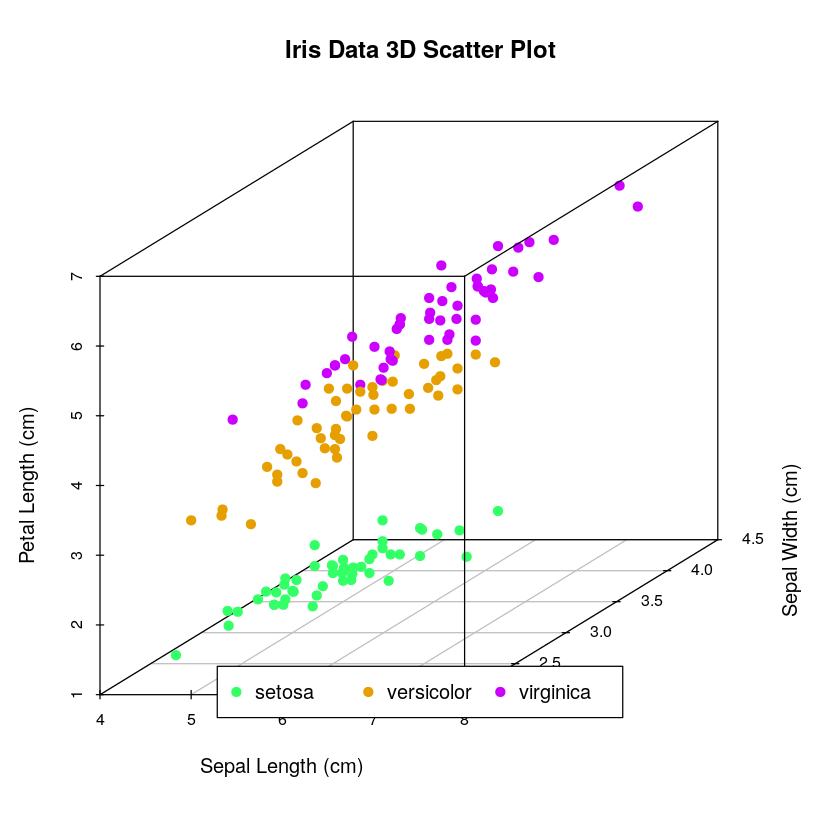

In [64]:
library("scatterplot3d")

scatterplot3d(iris[,1:3],
             main  = 'Iris Data 3D Scatter Plot',
             xlab  = 'Sepal Length (cm)',
             ylab  = 'Sepal Width (cm)',
             zlab  = 'Petal Length (cm)',
             pch   = 19,
            color = c("#33FF66", "#E69F00", "#CC00FF")[as.numeric(iris$Species)])
legend('bottom',legend = levels(iris$Species),col=c("#33FF66", "#E69F00", "#CC00FF"), pch=19, horiz=T)

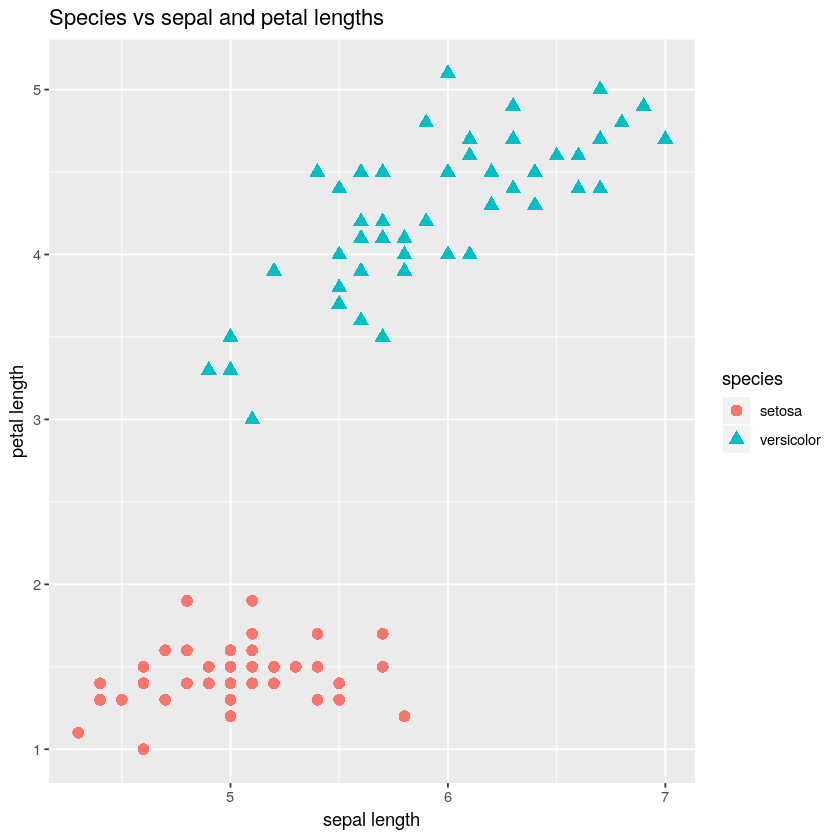

In [65]:
# plot data - a picture is worth a 1000 words. Melt data => then ggplot
library(ggplot2)
ggplot(train_iris, aes(x = sepal, y = petal)) + 
        geom_point(aes(colour=species, shape=species), size = 3) +
        xlab("sepal length") + 
        ylab("petal length") + 
        ggtitle("Species vs sepal and petal lengths")


In [66]:
# add binary labels corresponding to species - Initialize all values to 1
# add setosa label of -1. The binary +1, -1 labels are in the fourth  
# column. It is better to create two separate data frames: one containing
# the attributes while the other contains the class values.
train_iris[, 4] <- 1
train_iris[train_iris[, 3] == "setosa", 4] <- -1

x <- train_iris[, c(1, 2)]
y <- train_iris[, 4]

# head and tail of data 
head(x)

sepal,petal
<dbl>,<dbl>
5.1,1.4
4.9,1.4
4.7,1.3
4.6,1.5
5.0,1.4
5.4,1.7


In [67]:
head(y)

[1] -1 -1 -1 -1 -1 -1

In [68]:
# write function that takes in the data frame, learning rate - eta, and number of epochs - n.iter and updates the weight factor. At this stage, I am only conserned with the final weight and the number of epochs required for the weight to converge

perceptron <- function(x, y, eta, niter) {
        
        # initialize weight vector
        weight <- rep(0, dim(x)[2] + 1)
        errors <- rep(0, niter)
        
        
        # loop over number of epochs niter
        for (jj in 1:niter) {
                
                # loop through training data set
                for (ii in 1:length(y)) {
                        
                        # Predict binary label using Heaviside activation 
                        # function
                        z <- sum(weight[2:length(weight)] * 
                                         as.numeric(x[ii, ])) + weight[1]
                        if(z < 0) {
                                ypred <- -1
                        } else {
                                ypred <- 1
                        }
                        
                        # Change weight - the formula doesn't do anything 
                        # if the predicted value is correct
                        weightdiff <- eta * (y[ii] - ypred) * 
                                c(1, as.numeric(x[ii, ]))
                        weight <- weight + weightdiff
                        
                        # Update error function
                        if ((y[ii] - ypred) != 0.0) {
                                errors[jj] <- errors[jj] + 1
                        }
                        
                }
        }
        
        # weight to decide between the two species 
        print(weight)
        return(errors)
}

err <- perceptron(x, y, 1, 10)


[1] -4.0 -6.8 18.2


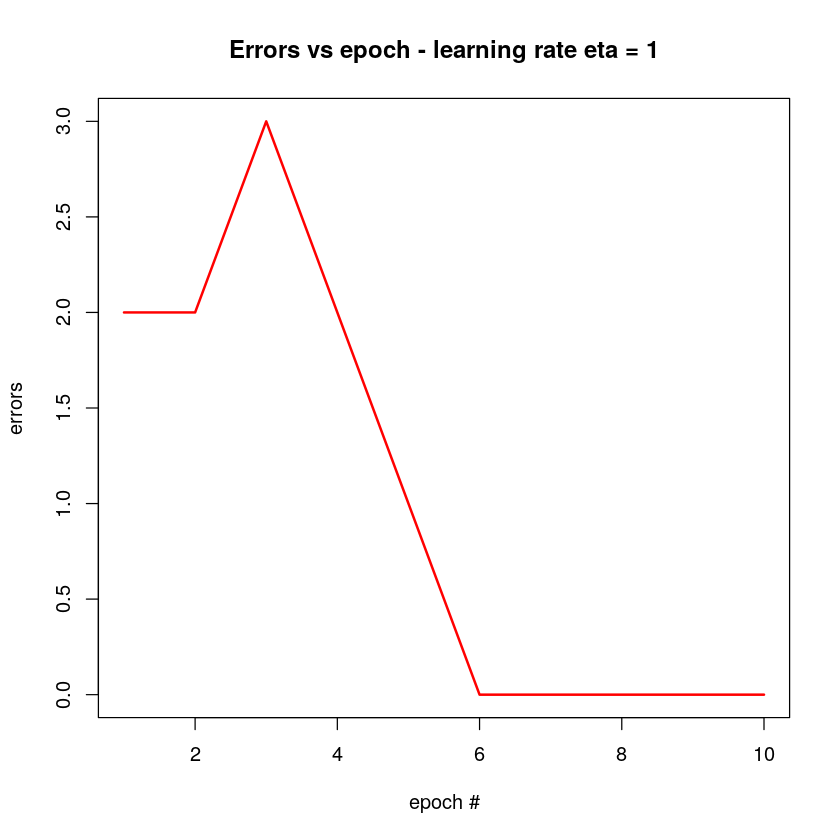

In [69]:
plot(1:10, err, type="l", lwd=2, col="red", xlab="epoch #", ylab="errors")
title("Errors vs epoch - learning rate eta = 1")

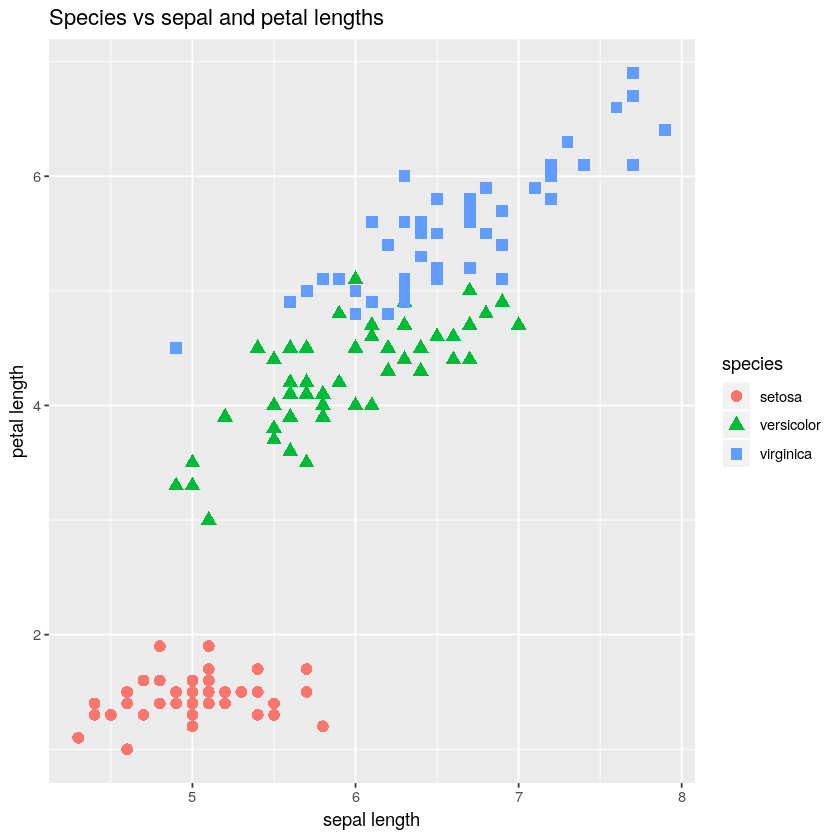

In [70]:
# iris data subset
irisdata <- iris[, c(1, 3, 5)]
names(irisdata) <- c("sepal", "petal", "species")

# ggplot the data
ggplot(irisdata, aes(x = sepal, y = petal)) + 
        geom_point(aes(colour=species, shape=species), size = 3) +
        xlab("sepal length") + 
        ylab("petal length") + 
        ggtitle("Species vs sepal and petal lengths")

In [71]:
# subset of properties of flowers of iris data set
x <- iris[, 1:4] 
names(x) <- tolower(names(x))

# create species labels
y <- rep(-1, dim(x)[1])
y[iris[, 5] == "virginica"] <- 1

# compute and plot error
err <- perceptron(x, y, 0.01, 50)

[1] -0.020 -0.732 -0.254  0.944  0.748


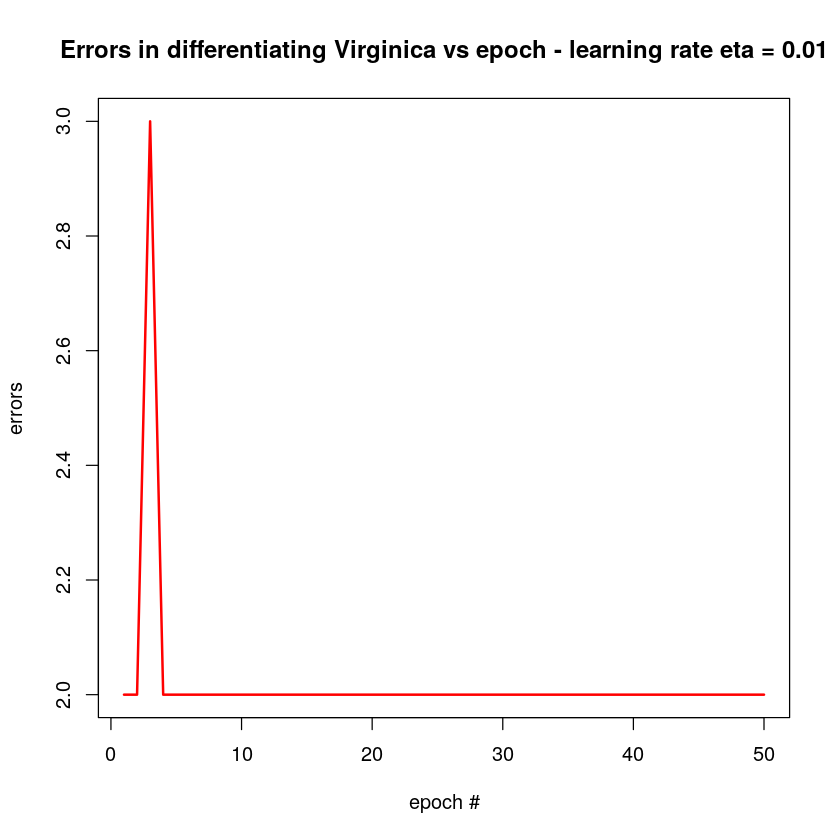

In [72]:
plot(1:50, err, type="l", lwd=2, col="red", xlab="epoch #", ylab="errors")
title("Errors in differentiating Virginica vs epoch - learning rate eta = 0.01")